In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [12]:
import os

os.getcwd()

'c:\\Users\\utilisateur\\OneDrive - Grenoble Ecole de Management\\Documents\\MADRID ESIC\\2S\\Proyecto Implementación Proyecto Predicción-POZ24-25\\ifood_proyecto_1\\src'

In [13]:
df=pd.read_csv(r'..\data\ml_project1_data\ml_project1_data.csv')

columns = df.columns
columns = [column.lower() for column in columns]
columns = [column.replace(' ', '_') for column in columns]
df.columns = columns

mnt_cols = [col for col in df.columns if col.startswith("mnt")]
df["mnt_total"] = df[mnt_cols].sum(axis=1)

df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_total
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

In [15]:
df.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_total
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


In [16]:
import pandas as pd

def get_unique_col_values(df):
    data = []
    for column in df:
        unique_values = df[column].unique()[:5]  
        data.append([column, unique_values, df[column].dtype])

 
    unique_df = pd.DataFrame(data, columns=["Colonne", "Valeurs Uniques (5 max)", "Type"])
    return unique_df


unique_values_df = get_unique_col_values(df)
print(unique_values_df)


                Colonne                            Valeurs Uniques (5 max)  \
0                    id                     [5524, 2174, 4141, 6182, 5324]   
1            year_birth                     [1957, 1954, 1965, 1984, 1981]   
2             education         [Graduation, PhD, Master, Basic, 2n Cycle]   
3        marital_status       [Single, Together, Married, Divorced, Widow]   
4                income      [58138.0, 46344.0, 71613.0, 26646.0, 58293.0]   
5               kidhome                                          [0, 1, 2]   
6              teenhome                                          [0, 1, 2]   
7           dt_customer  [2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1...   
8               recency                               [58, 38, 26, 94, 16]   
9              mntwines                           [635, 11, 426, 173, 520]   
10            mntfruits                                 [88, 1, 49, 4, 43]   
11      mntmeatproducts                             [546, 6, 127

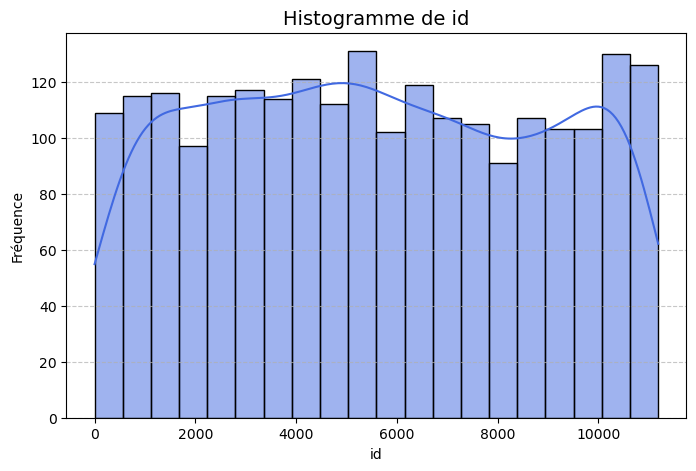

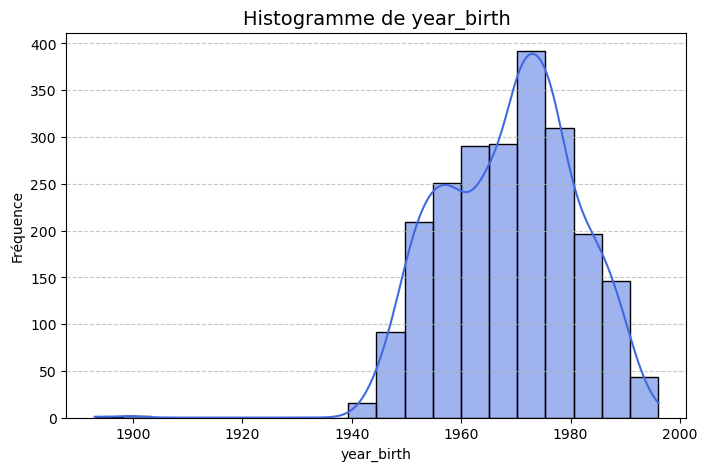

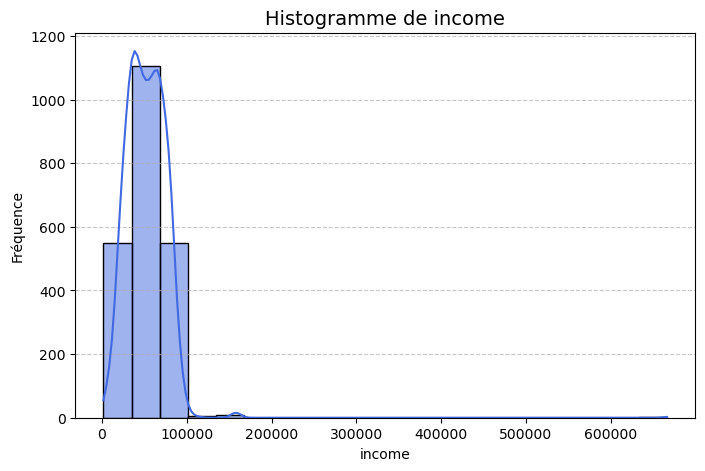

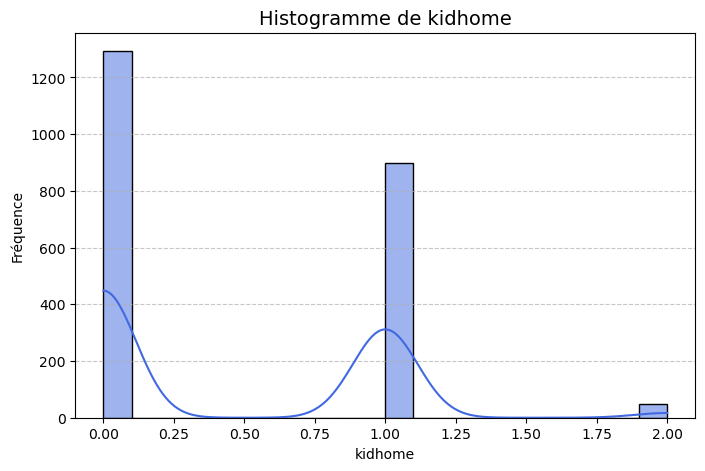

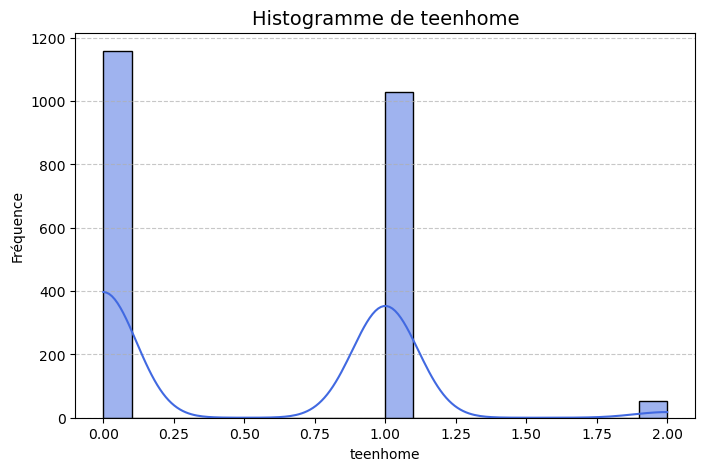

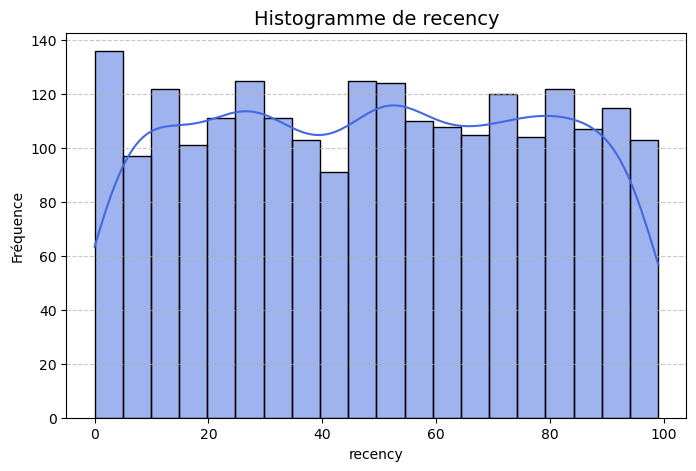

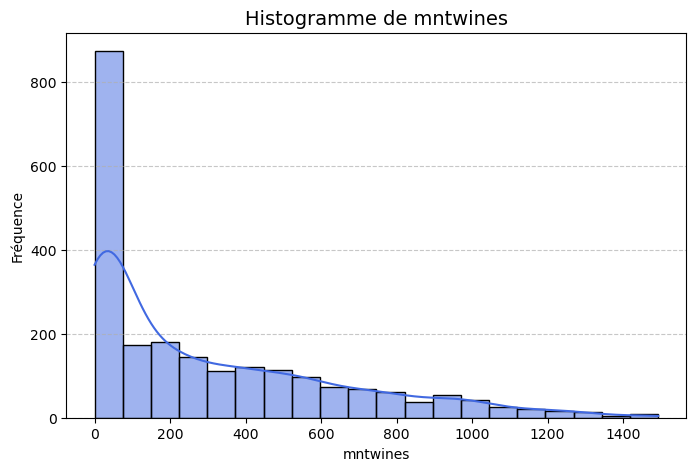

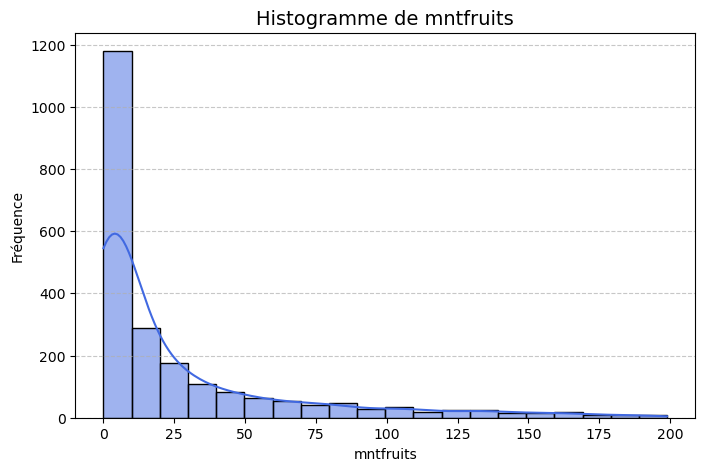

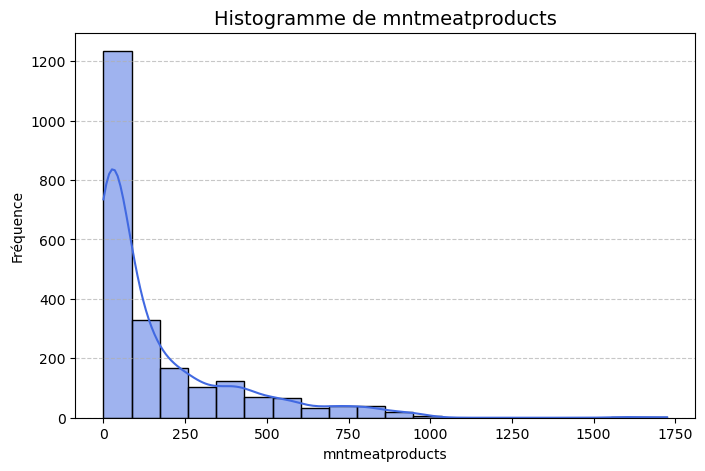

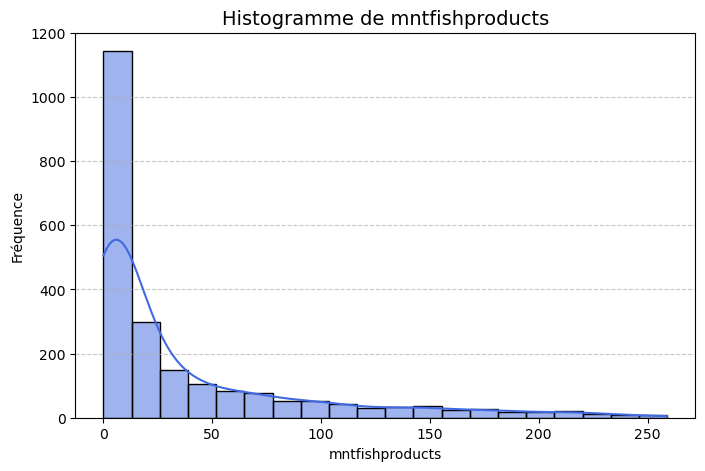

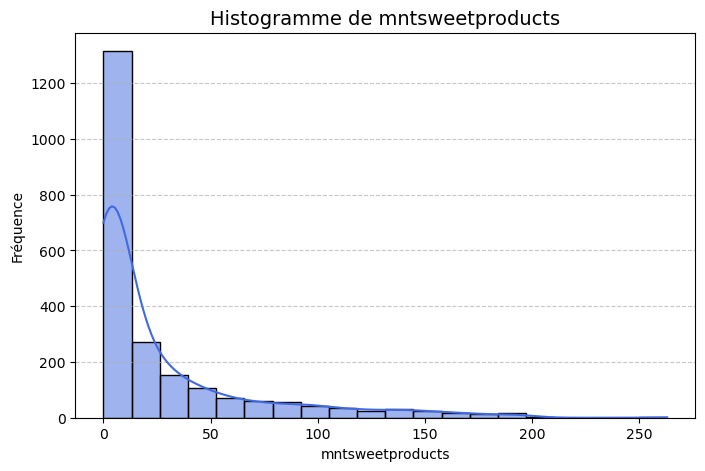

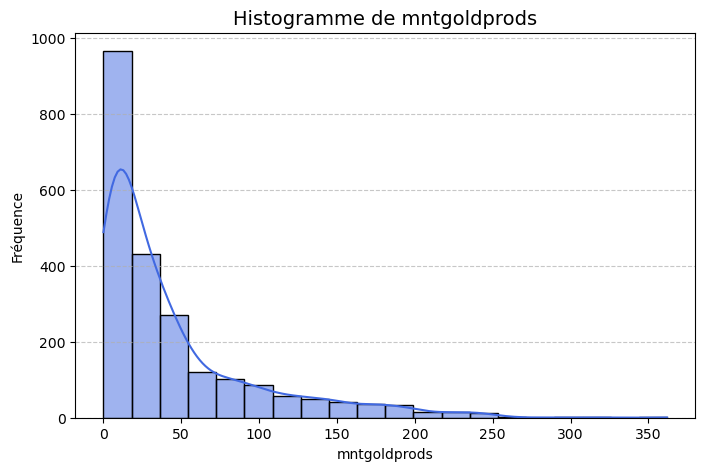

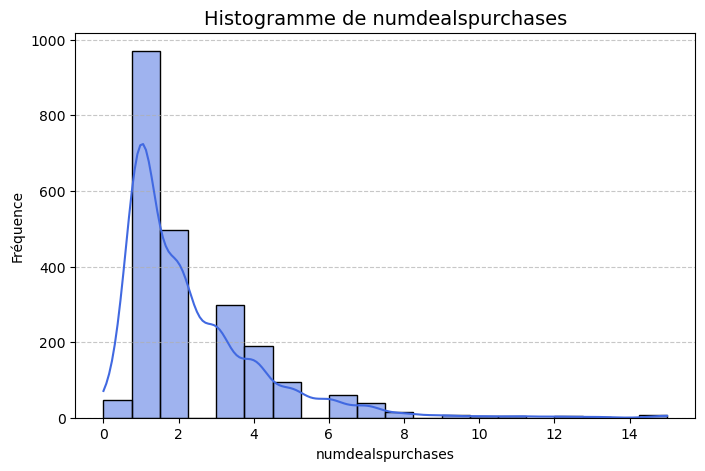

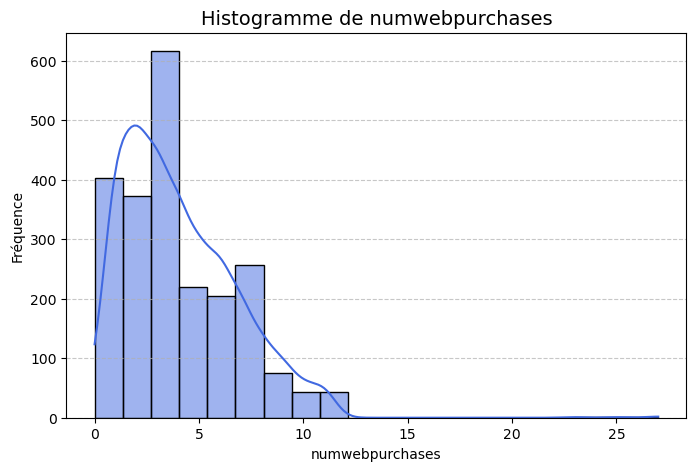

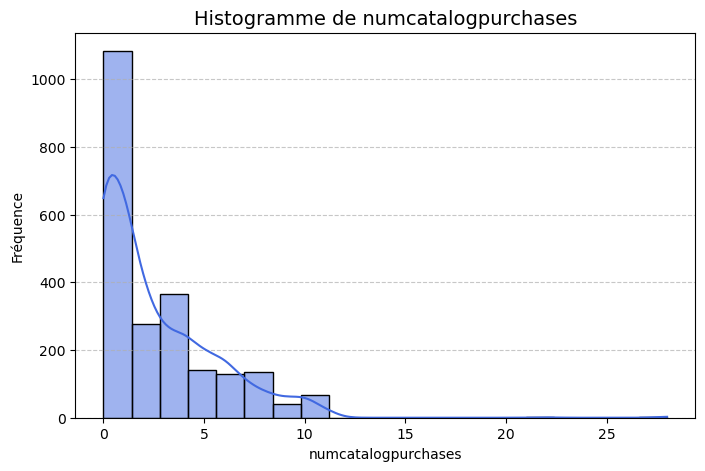

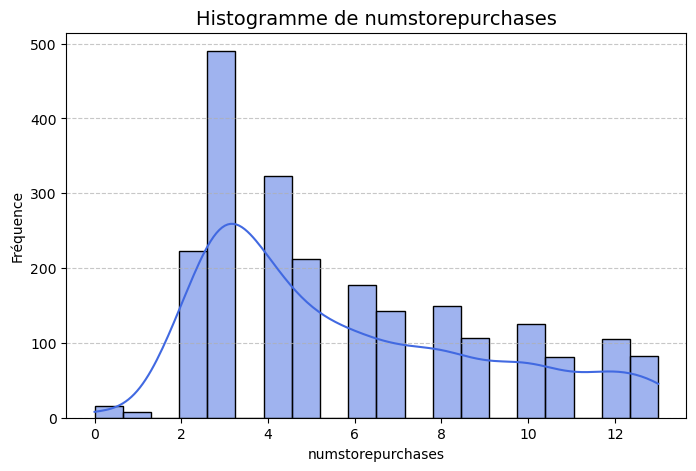

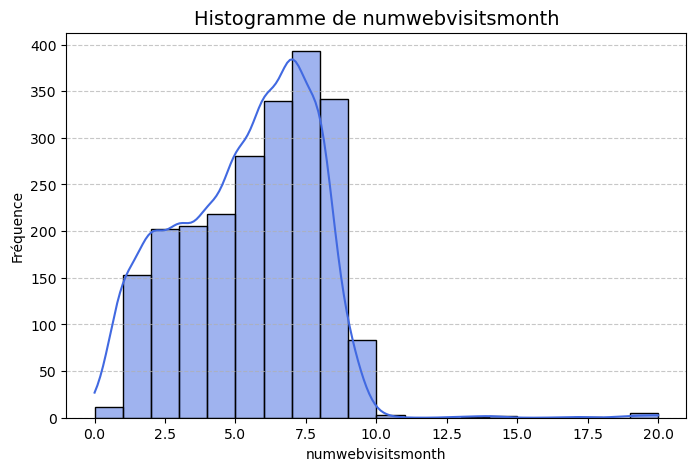

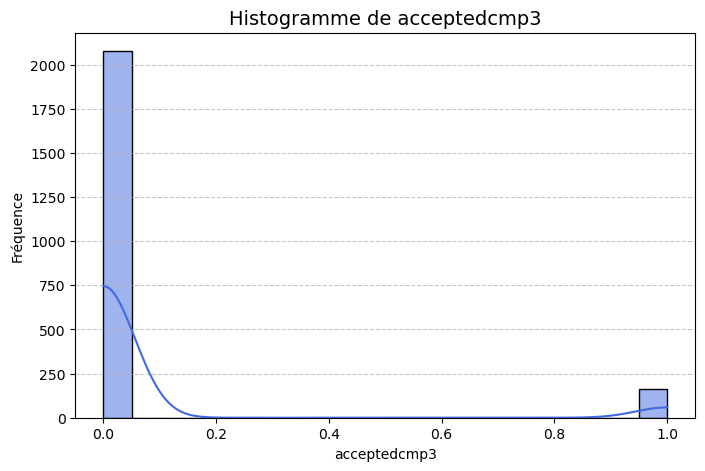

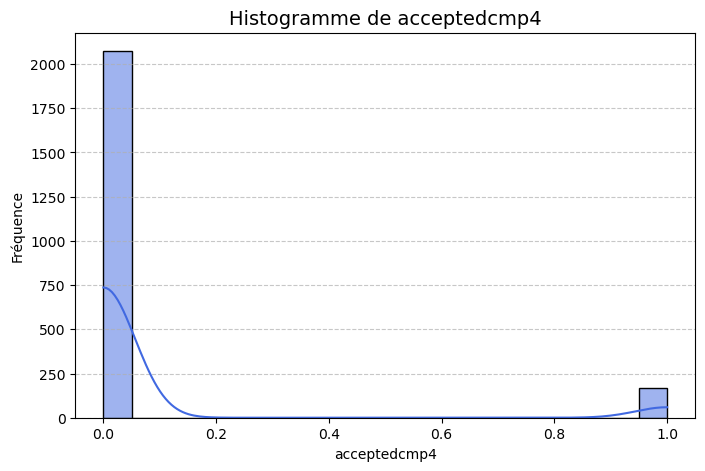

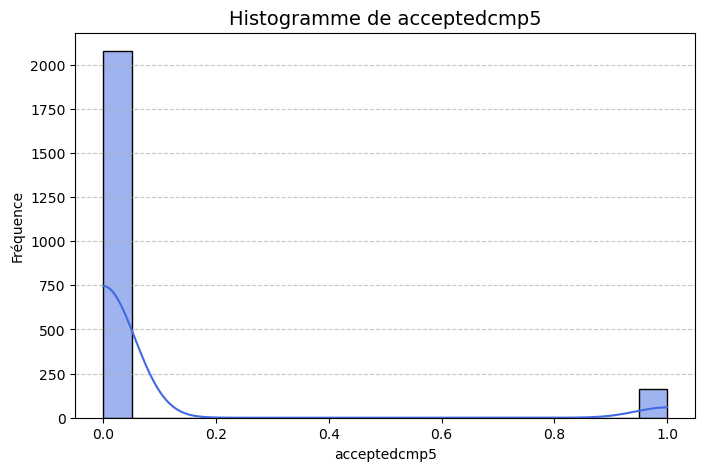

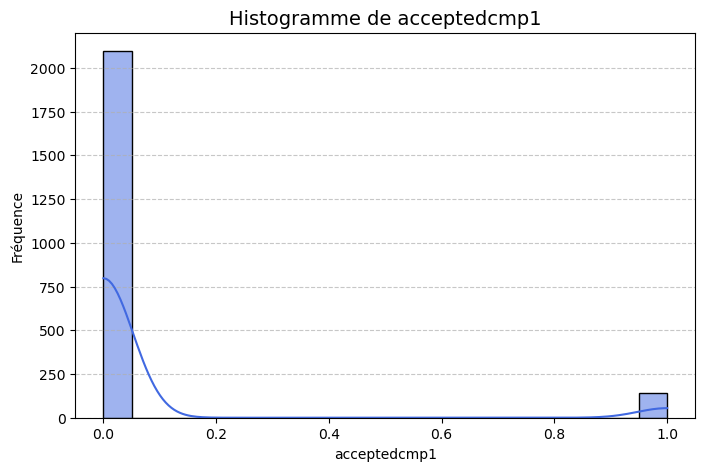

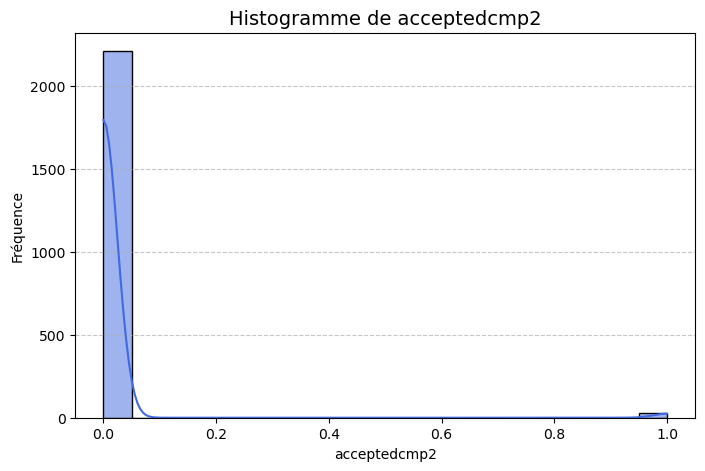

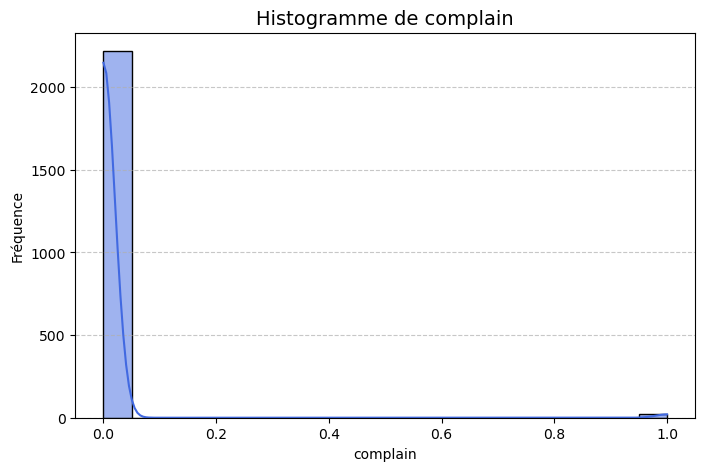

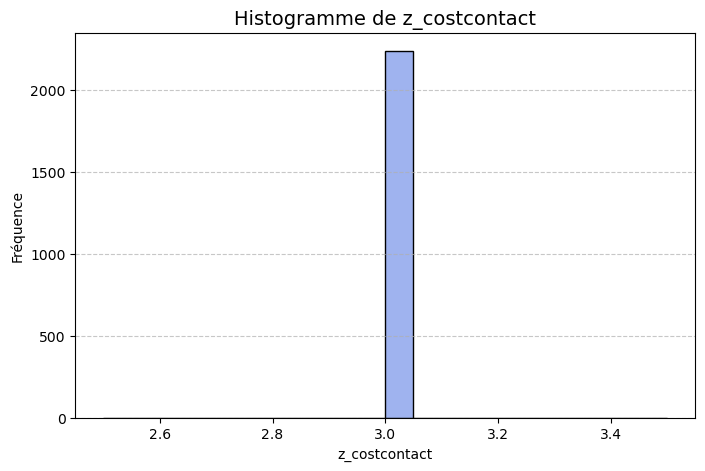

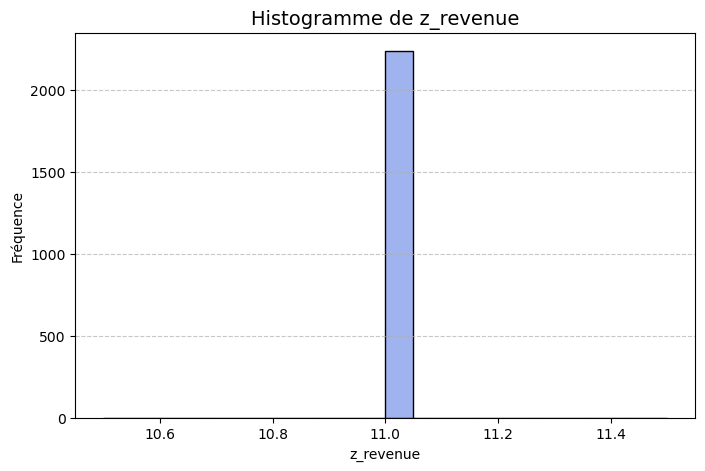

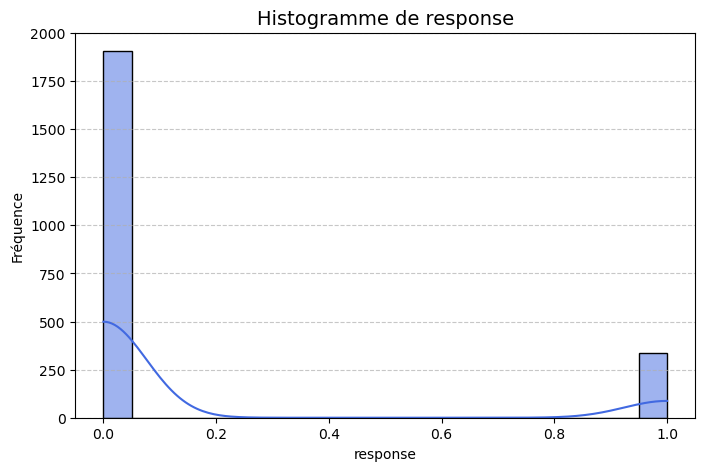

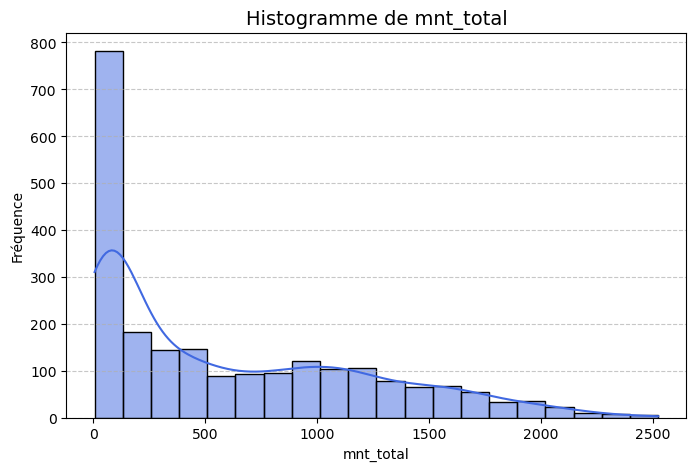

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms_one_by_one(df, bins=20):
    num_cols = df.select_dtypes(include=["number"]).columns 
    
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=bins, kde=True, color="royalblue")
        plt.title(f"Histogramme de {col}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()  


plot_histograms_one_by_one(df)



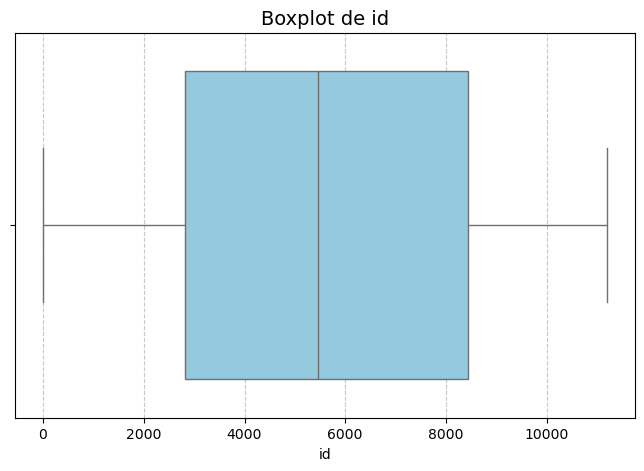

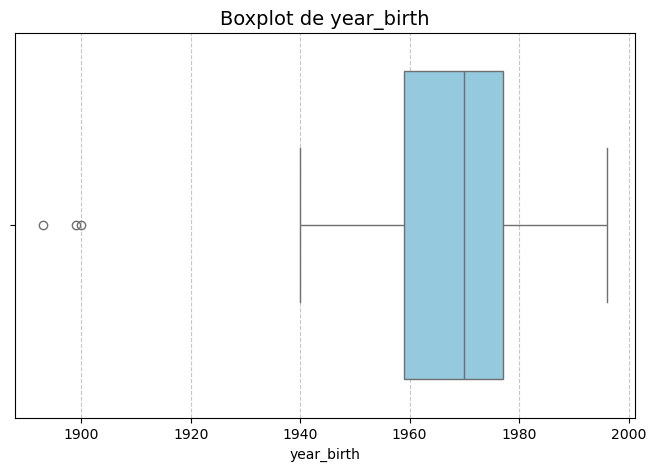

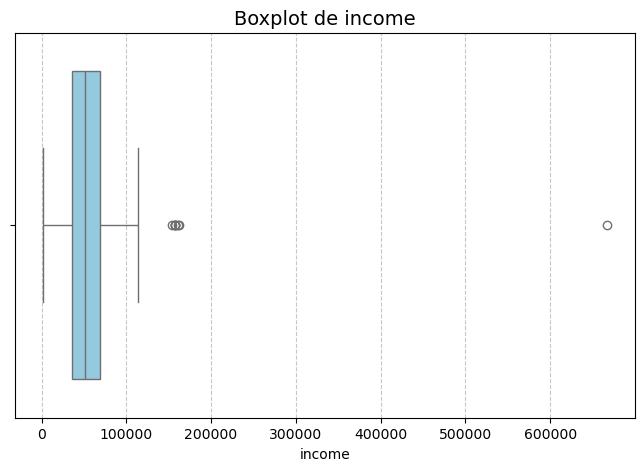

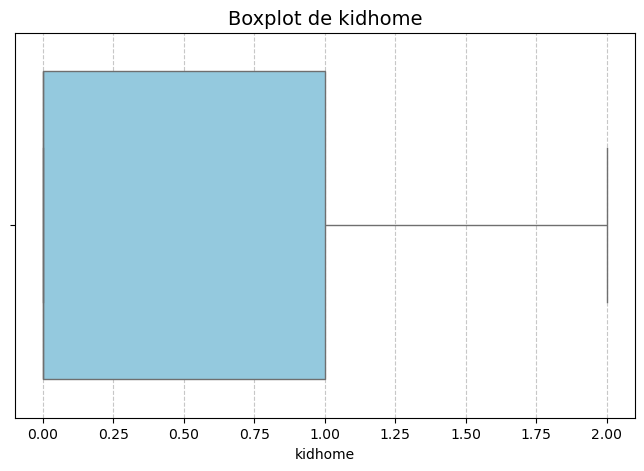

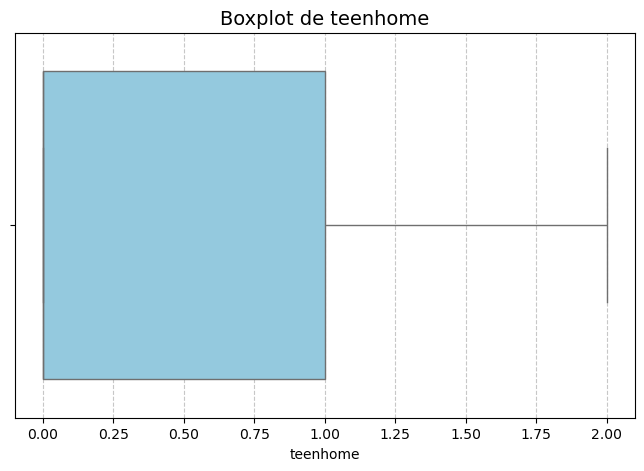

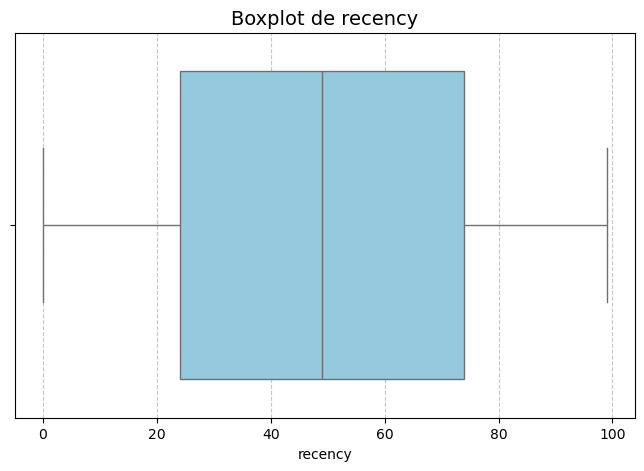

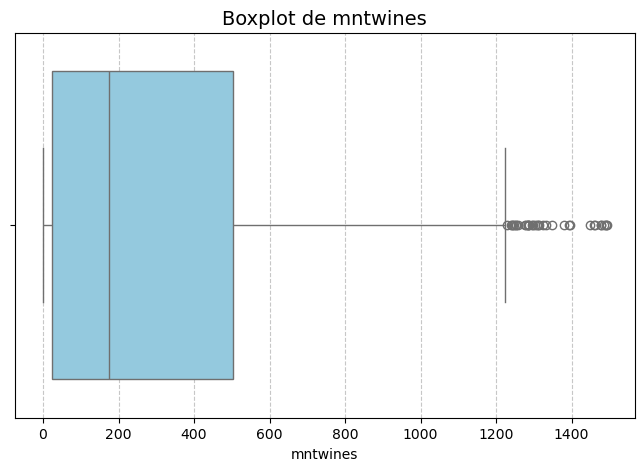

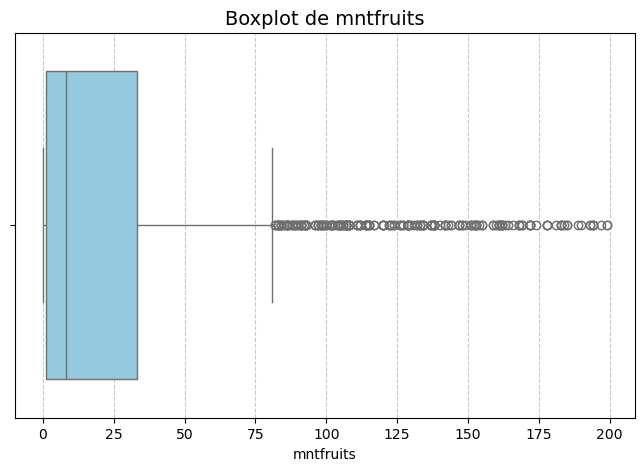

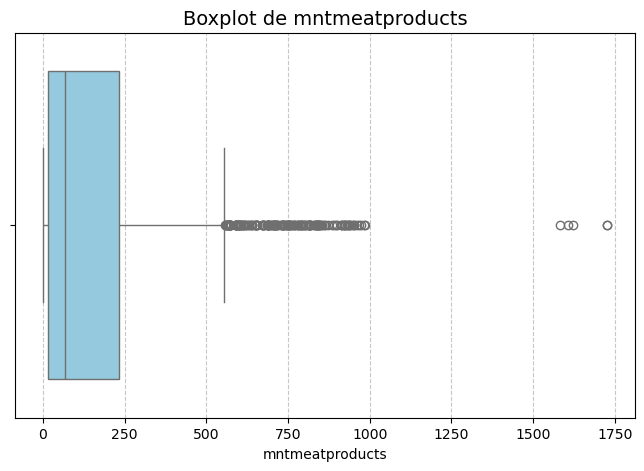

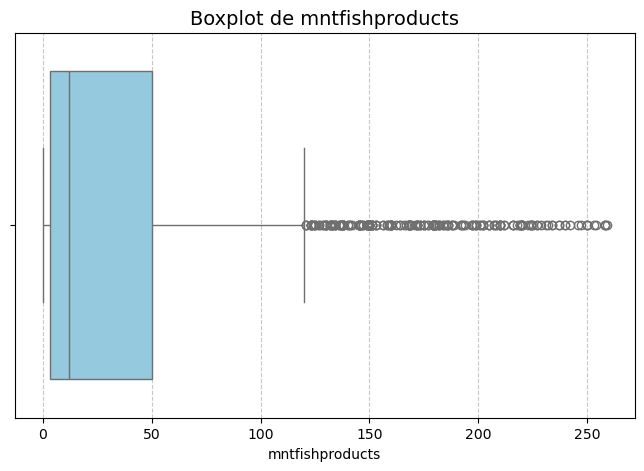

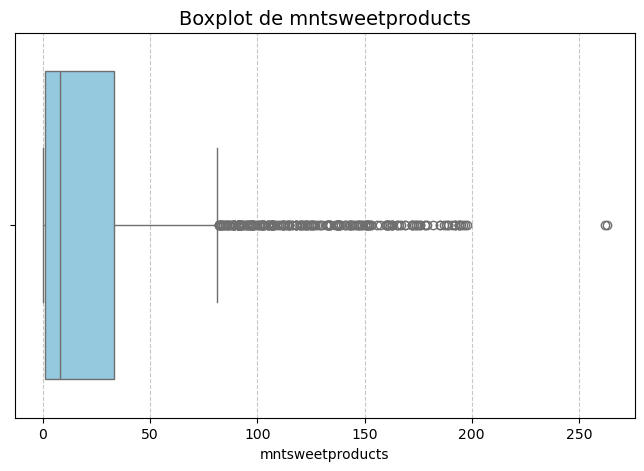

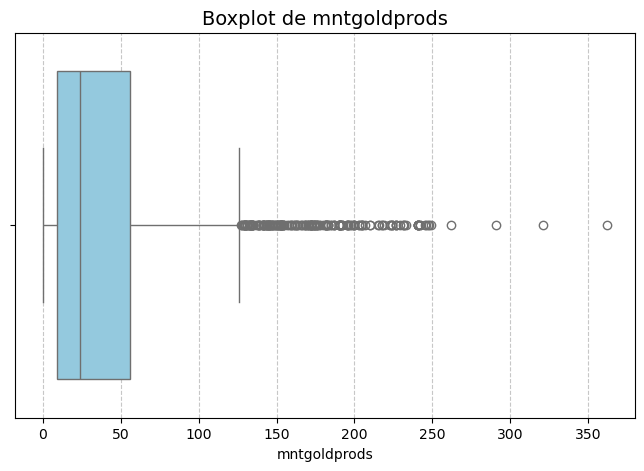

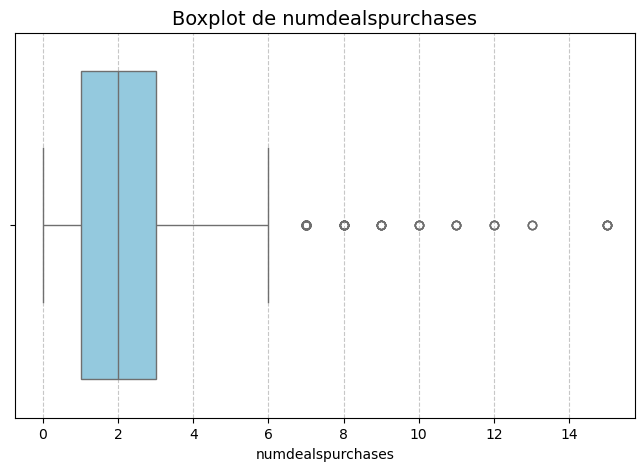

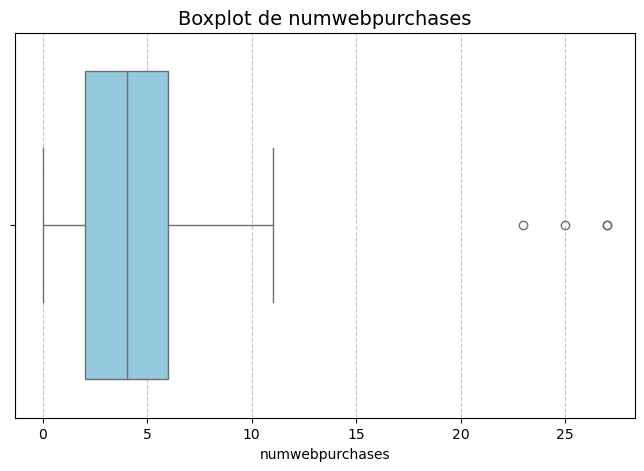

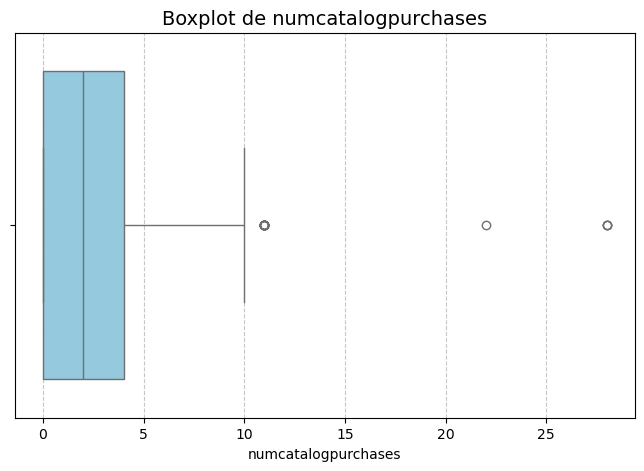

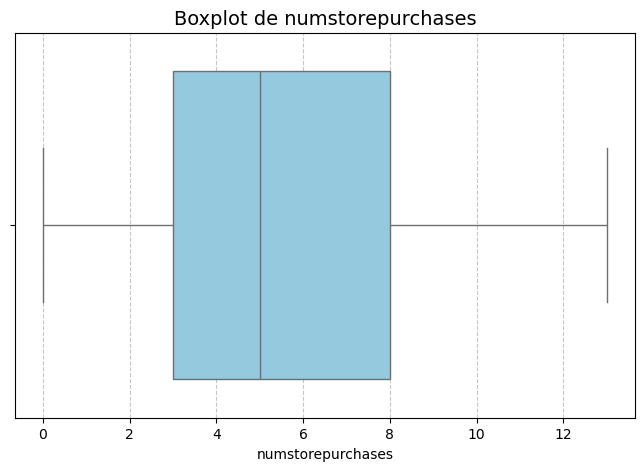

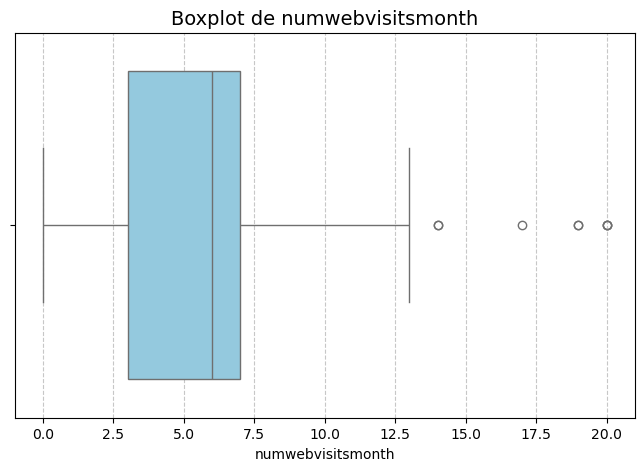

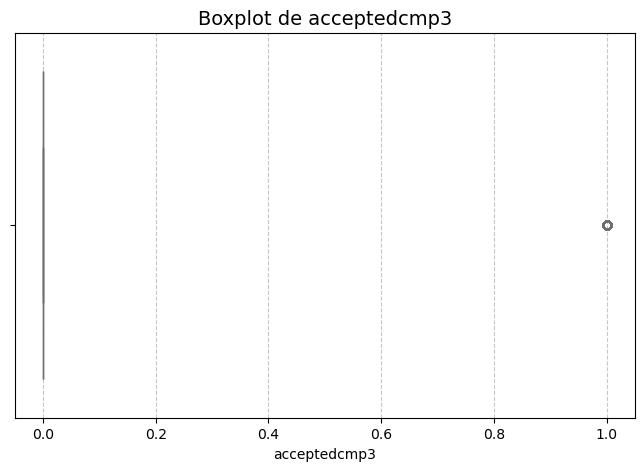

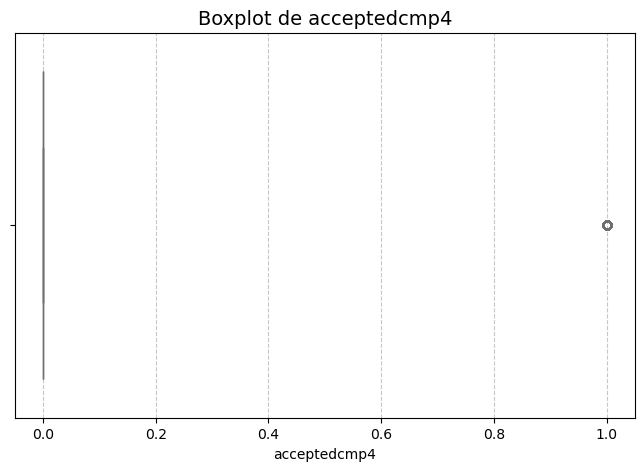

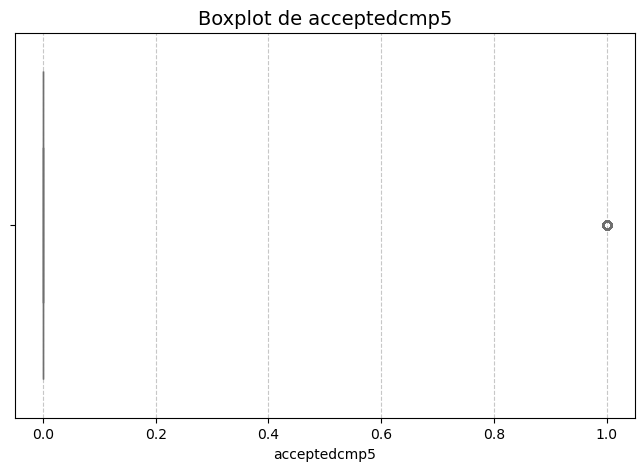

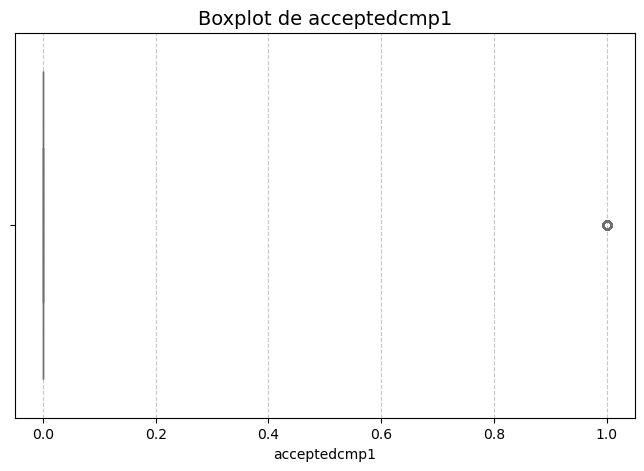

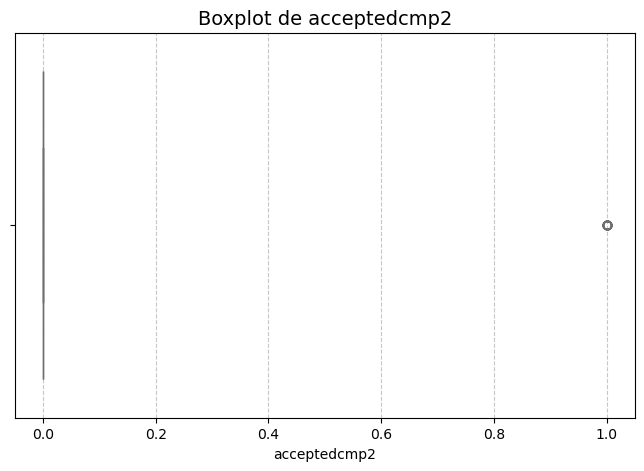

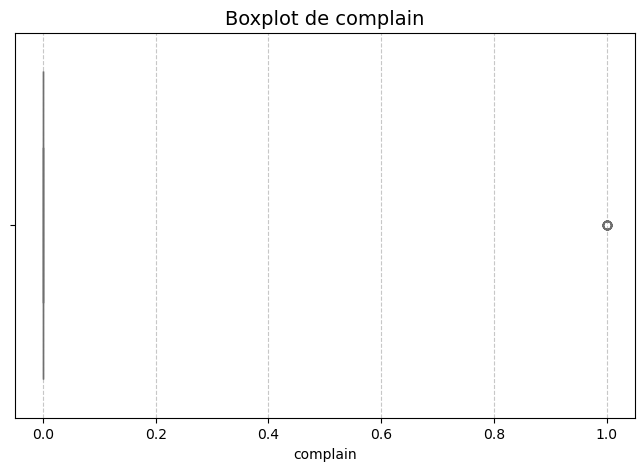

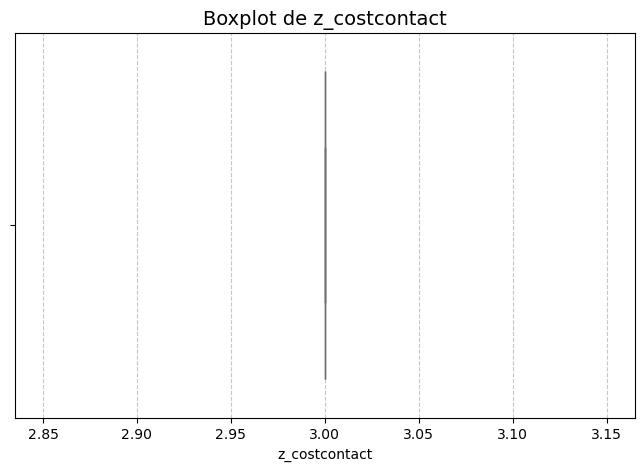

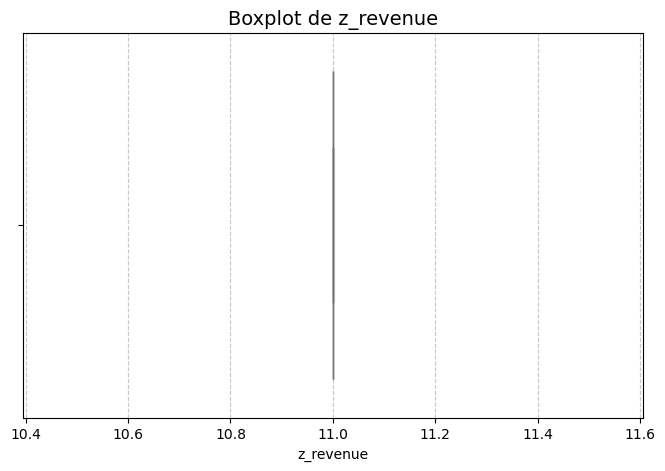

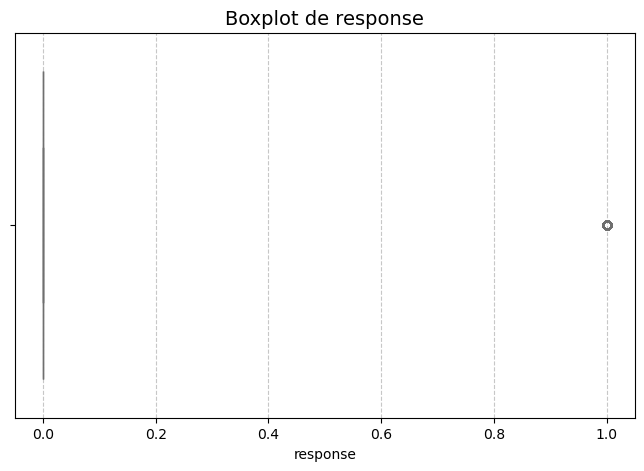

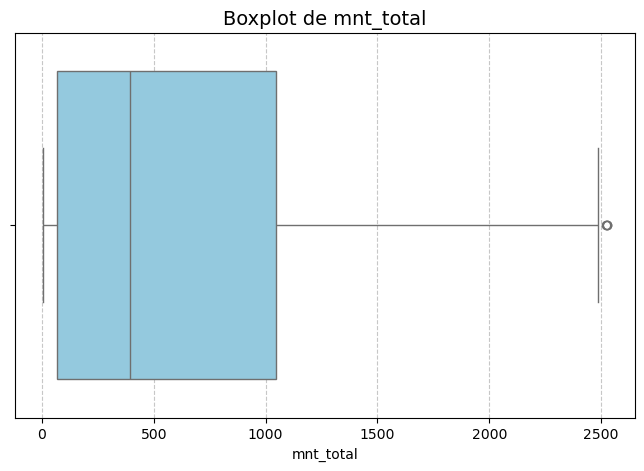

In [18]:
def plot_boxplots_one_by_one(df):
    num_cols = df.select_dtypes(include=["number"]).columns 
    
    for col in num_cols:
        plt.figure(figsize=(8, 5))  
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot de {col}", fontsize=14)
        plt.xlabel(col)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.show()  

plot_boxplots_one_by_one(df)


In [19]:
df_grouped = df.groupby("id")["mnt_total"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="mnt_total", ascending=False)
print(df_grouped.head(10))



         id  mnt_total
1102   5350       2525
1174   5735       2525
352    1763       2524
924    4580       2486
903    4475       2440
1117   5453       2352
1996  10133       2349
1788   9010       2346
1106   5386       2302
1232   6024       2302


In [20]:

folder_path = "../data" 
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, "dataset_wTotal.csv")
df.to_csv(file_path, index=False)
print(f"Dataset sauvegardé sous {file_path}")


Dataset sauvegardé sous ../data\dataset_wTotal.csv
